# Copyright Notice
All study materials, exercises, and examples mentioned in these notes are based on DataCamp's courses and resources. These notes are intended solely for personal study and review purposes. They are not intended for commercial use or distribution. All original content and intellectual property rights belong to DataCamp.

These notes contain my own summaries and explanations of the concepts I learned, as well as my own implementations of the exercises. Any direct quotations or closely related material are clearly marked and attributed to DataCamp.

For more detailed information, please refer to the official courses at [DataCamp](https://www.datacamp.com/).

# 2.0 Chapter Intro

Embeddings enable powerful AI applications, including semantic search engines, recommendation engines, and classification tasks like sentiment analysis. Learn how to use OpenAI's embeddings model to enable these exciting applications!

In [1]:
# Preparation to load functions from common_functions.py
# and save the api-key for security reason
import importlib
import common_functions
importlib.reload(common_functions)
print(dir(common_functions))

common_functions.py is being imported
common_functions.py is being imported
common_functions.py is being imported
common_functions.py is being imported
['OpenAI', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'create_embeddings', 'get_openai_client', 'print_dict_with_partial_embeddings', 'print_list_of_embeddings']


In [2]:
# get_openai_client is used to 'hide' the api_key
from common_functions import get_openai_client
from common_functions import create_embeddings
from common_functions import print_list_of_embeddings
from common_functions import print_dict_with_partial_embeddings

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 2.1 Semantic search and enriched embeddings  00:00 - 00:15
In this chapter, we'll begin to apply what you've already learned to implement the most popular embedding applications: semantic search, recommendation systems, and classification tasks. Let's start with semantic searchtice!  05:05 - 05:08
Now it's your turn!

## 2-3. Semantic search  00:15 - 01:05
Recall that semantic search engines use embeddings to return the most semantically similar results to a search query. For example, a news website could enable semantic search by embedding news article information like the headline and topic. A user searching `"computer"` could then be returned a selection of computer-related headlines.

There are three steps to semantic search: 
- embed the search query and texts to compare against,
- compute the cosine distances between the embedded search query and other embedded texts,
- and finally, extract the texts with the smallest cosine distance. Let's implement this semantic article search using the OpenAI API and Python.

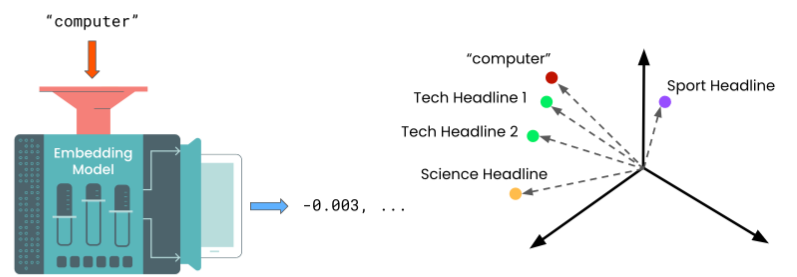

## 4. Enriched embeddings  01:05 - 01:29
Here's the headlines data we'll be working with. We'll embed not only the headline text, but also the topic and keywords. To do this, we'll combine the information from each article into a single string that reflects the information stored in the dictionary, and the keywords are delimited with a comma and space.

In [3]:
articles = [
    {
        "headline": "Economic Growth Continues Amid Global Uncertainty",
        "topic": "Business",
        "keywords": ["economy", "business", "finance"]
    },
    {
        "headline": "Interest rates fall to historic lows",
        "topic": "Business",
        "keywords": ["Economic news", "Historic interest rates", "Financial market update"]
    },
    {
        "headline": "Scientists Make Breakthrough Discovery in Renewable Energy",
        "topic": "Science",
        "keywords": ["Renewable energy breakthrough", "Scientific discovery", "Green technology advancement"]
    },
    {
        "headline": "India Successfully Lands Near Moon's South Pole",
        "topic": "Science",
        "keywords": ["Moon landing", "India space mission", "Science"]
    },
    {
        "headline": "New Particle Discovered at CERN", 
        "topic": "Science",
        "keywords": ["Particle Discovery", "CERN", "Scientific Breakthrough"]
    },
    {
        "headline": "Tech Company Launches Innovative Product to Improve Online Accessibility",
        "topic": "Tech",
        "keywords": ["Tech Innovation", "Online Accessibility", "Product Launch"]
    },
    {
        "headline": "Tech Giant Buys 49% Skate In AI Startup", 
        "topic": "Tech",
        "keywords": ["Tech Acquisition", "AI", "Startup Investment"]
    },
    {
        "headline": "New Social Media Platform Has Everyone Talking!", 
        "topic": "Tech",
        "keywords": ["Social Media Buzz", "Online Engagement", "Viral Platform"]
    },
    {
        "headline": "The Blues get promoted on the final day of the season!", 
        "topic": "Sport",
        "keywords": ["hockey", "NHL"]
    },
    {
        "headline": "1.5 Billion Tune-in to the World Cup Final",
        "topic": "Sport",
        "keywords": ["soccer", "world cup", "tv"]
    },
]

## 5. Combining features with F-strings  01:29 - 02:52
To combine these features for each article, we'll define a function called `create_article_text`. 

This function uses an F-string, or formatted string, to return the desired string structure. F-strings allow us to insert variables into strings without having to convert them into strings and concatenate them. F-strings are created by specifying an f before the quotes, and note that we've defined a multi-line string using triple quotes. 

To insert an object, we use curly brackets and specify the variable or other Python code to insert. For the article headline and topic, these values are extracted using their keys and inserted into the string at the desired locations. The keywords are a little trickier because they were stored as a list rather than a string. 

To convert the keywords list into a string, we use the `join` list method, which joins the contents of the list together into a single string. The method is called on the string we want to delimit each keyword with, in this case, a comma and space.

Calling the function on the final headline shows the text in the desired formatted string.

In [4]:
def create_article_text(article):
    return f"""Headline: {article['headline']}
Topic: {article['topic']}
Keywords: {', '.join(article['keywords'])}"""

In [5]:
print(create_article_text(articles[-1]))

Headline: 1.5 Billion Tune-in to the World Cup Final
Topic: Sport
Keywords: soccer, world cup, tv



## 6. Creating enriched embeddings  02:52 - 03:21
To apply the function and combine the features for each article, we use a list comprehension, calling our function on each article in articles. Finally, to embed these strings, we call the `create_embeddings` function on the result. Recall, that this creates a list of embeddings for each input using the OpenAI API. Now that we have our embeddings, it's time to compute cosine distances.

In [6]:
article_texts = [create_article_text(article) for article in articles]

# Call two user defined functions to hide the api-key
client = get_openai_client()
article_embeddings = create_embeddings(client, article_texts)

In [14]:
print(type(article_embeddings))
print(len(article_embeddings))
# [print(len(article_embedding)) for article_embedding in article_embeddings]
# Print the first and last embeddings number by omission way
outputList=[0,-1]
for i in outputList:
    print_list_of_embeddings(article_embeddings[i])

<class 'list'>
10
embeddings: [
   -0.023219764232635498 ,
   -0.03148265555500984 ,
    ...
   -0.0023190348874777555 ,
   -0.016107404604554176 ,
 ]
embeddings: [
   -0.004748535342514515 ,
   0.002839711494743824 ,
    ...
   -0.01376503985375166 ,
   -0.007729392498731613 ,
 ]


## 7. Computing distances  03:21 - 04:21
We'll define a function called `find_n_closest`, that takes a `query_vector`, the embedded search query, and embeddings to compare against, our embedded articles, and returns the n most similar results based on their cosine distances. For each embedding, we calculate the cosine distance to the `query_vector`, and store it in a dictionary along with the embedding's index, which we append to a list called distances. To sort the distances list by the distance key in each dictionary, we use the sorted function and its key argument. The key argument takes a function to evaluate each dictionary in distances and sort by; in this case, it's a lambda function that accesses the distance key from each dictionary. Finally, the function returns the closest n results.

In [12]:
from scipy.spatial import distance

def find_n_colsest(query_vector, embeddings, n=3):
    distances = []
    for index, embedding in enumerate(embeddings):
        dist = distance.cosine(query_vector, embedding)
        distances.append({"distance": dist, "index": index})
    distances_sorted = sorted(distances, key=lambda x: x["distance"])
    return distances_sorted[0:n]

## 8. Returning the search results  04:21 - 05:05
Time to bring all the semantic search pieces together! We'll query our embeddings using the text, `"AI"`. First, we embed the search query using our `create_embeddings` function and extract its embeddings by zero-indexing. Next, we use the `find_n_closest` function to find the three closest hits based on our `article_embeddings`. Finally, to extract the most similar headlines, we loop through each hit, using the hit's index to subset the corresponding headline, and print. As we'd expect, the top result specifically mentions `AI`, and the others are on similar topics.

In [13]:
query_text = "AI"
query_vector = create_embeddings(client, query_text)[0]

hits = find_n_colsest(query_vector, article_embeddings)

for hit in hits:
    article = articles[hit['index']]
    print(article['headline'])

Tech Giant Buys 49% Skate In AI Startup
Tech Company Launches Innovative Product to Improve Online Accessibility
1.5 Billion Tune-in to the World Cup Final


## 9. Let's practice!  05:05 - 05:08
Now it's your turn!

# 2.2 Enriching embeddings
Previously, when you embedded product information, you were limited to only embedding the product `'short_description'`, which captured some, but not all of the relevant product information available. In this exercise, you'll embed `'title'`, `'short_description'`, `'category'`, and `'features'` to capture much more information.

Here's a reminder of the products list of dictionaries:
```
products = [
- {
    - `"title"`: "Smartphone X1",
    - `"short_description"`: "The latest flagship smartphone with AI-powered features and 5G connectivity.",
    - `"price"`: `799.99`,
    - `"category"`: `"Electronics"`,
    - `"features"`: [
"6.5-inch AMOLED display",
"Quad-camera system with 48MP main sensor",
"Face recognition and fingerprint sensor",
"Fast wireless charging"
    - ]
- },
- ...
]
```
When combining the features into a single string, it should have the following structure:
```
Title: <product title>
Description: <product description>
Category: <product category>
Features: <feature 1>; <feature 2>; <feature 3>; ...
```

Instructions  100XP
- Copy your API key and provide it to the OpenAI client.
- Define a function called `create_product_text()` to combine the title, `short_description`, category, and features data into a single string with the desired structure.
- Use `create_product_text()` to combine the features for each product in products, storing the results in a list.
- Embed the text in `product_texts`.

In [17]:
products = [{'title': 'Smartphone X1',
  'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.',
  'price': 799.99,
  'category': 'Electronics',
  'features': ['6.5-inch AMOLED display',
   'Quad-camera system with 48MP main sensor',
   'Face recognition and fingerprint sensor',
   'Fast wireless charging']},
 {'title': 'Luxury Diamond Necklace',
  'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.',
  'price': 1499.99,
  'category': 'Beauty',
  'features': ['18k white gold chain',
   '0.5 carat diamond pendant',
   'Adjustable chain length',
   'Gift box included']},
 {'title': 'RC Racing Car',
  'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.',
  'price': 89.99,
  'category': 'Toys',
  'features': ['Top speed of 30 mph',
   'Responsive remote control',
   'Rechargeable battery',
   'Durable construction']},
 {'title': 'Ultra HD 4K TV',
  'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.',
  'price': 1299.99,
  'category': 'Electronics',
  'features': ['65-inch 4K UHD display',
   'Dolby Vision and HDR10+ support',
   'Smart TV with streaming apps',
   'Voice remote included']},
 {'title': 'Glowing Skin Serum',
  'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.',
  'price': 39.99,
  'category': 'Beauty',
  'features': ['Hyaluronic acid and vitamin C',
   'Hydrates and reduces fine lines',
   'Suitable for all skin types',
   'Cruelty-free']},
 {'title': 'LEGO Space Shuttle',
  'short_description': 'Build your own space adventure with this LEGO space shuttle set.',
  'price': 49.99,
  'category': 'Toys',
  'features': ['359 pieces for creative building',
   'Astronaut minifigure included',
   'Compatible with other LEGO sets',
   'For ages 7+']},
 {'title': 'Wireless Noise-Canceling Headphones',
  'short_description': 'Enjoy immersive audio and block out distractions with these headphones.',
  'price': 199.99,
  'category': 'Electronics',
  'features': ['Active noise cancellation',
   'Bluetooth 5.0 connectivity',
   'Long-lasting battery life',
   'Foldable design for portability']},
 {'title': 'Luxury Perfume Gift Set',
  'short_description': 'Indulge in a collection of premium fragrances with this gift set.',
  'price': 129.99,
  'category': 'Beauty',
  'features': ['Five unique scents',
   'Elegant packaging',
   'Perfect gift for fragrance enthusiasts',
   'Variety of fragrance notes']},
 {'title': 'Remote-Controlled Drone',
  'short_description': 'Take to the skies and capture stunning aerial footage with this drone.',
  'price': 299.99,
  'category': 'Electronics',
  'features': ['4K camera with gimbal stabilization',
   'GPS-assisted flight',
   'Remote control with smartphone app',
   'Return-to-home function']},
 {'title': 'Luxurious Spa Gift Basket',
  'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.',
  'price': 79.99,
  'category': 'Beauty',
  'features': ['Bath bombs, body lotion, and more',
   'Aromatherapy candles',
   'Reusable wicker basket',
   'Great for self-care']},
 {'title': 'Robot Building Kit',
  'short_description': 'Learn robotics and coding with this educational robot building kit.',
  'price': 59.99,
  'category': 'Toys',
  'features': ['Build and program your own robot',
   'STEM learning tool',
   'Compatible with Scratch and Python',
   'Ideal for young inventors']},
 {'title': 'High-Performance Gaming Laptop',
  'short_description': 'Dominate the gaming world with this powerful gaming laptop.',
  'price': 1499.99,
  'category': 'Electronics',
  'features': ['Intel Core i7 processor',
   'NVIDIA RTX graphics',
   '144Hz refresh rate display',
   'RGB backlit keyboard']},
 {'title': 'Natural Mineral Makeup Set',
  'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.',
  'price': 34.99,
  'category': 'Beauty',
  'features': ['Mineral foundation and eyeshadows',
   'Non-comedogenic and paraben-free',
   'Cruelty-free and vegan',
   'Includes makeup brushes']},
 {'title': 'Interactive Robot Pet',
  'short_description': 'Adopt your own robot pet that responds to your voice and touch.',
  'price': 79.99,
  'category': 'Toys',
  'features': ['Realistic pet behaviors',
   'Voice recognition and touch sensors',
   'Teaches responsibility and empathy',
   'Rechargeable battery']},
 {'title': 'Smart Thermostat',
  'short_description': "Control your home's temperature and save energy with this smart thermostat.",
  'price': 129.99,
  'category': 'Electronics',
  'features': ['Wi-Fi connectivity',
   'Energy-saving features',
   'Compatible with voice assistants',
   'Easy installation']},
 {'title': 'Designer Makeup Brush Set',
  'short_description': 'Upgrade your makeup routine with this premium designer brush set.',
  'price': 59.99,
  'category': 'Beauty',
  'features': ['High-quality synthetic bristles',
   'Chic designer brush handles',
   'Complete set for all makeup needs',
   'Includes stylish carrying case']},
 {'title': 'Remote-Controlled Dinosaur Toy',
  'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
  'price': 49.99,
  'category': 'Toys',
  'features': ['Realistic dinosaur sound effects',
   'Walks and roars like a real dinosaur',
   'Remote control included',
   'Educational and entertaining']},
 {'title': 'Wireless Charging Dock',
  'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.',
  'price': 39.99,
  'category': 'Electronics',
  'features': ['Qi wireless charging technology',
   'Supports multiple devices',
   'LED charging indicators',
   'Compact and stylish design']},
 {'title': 'Luxury Skincare Set',
  'short_description': 'Elevate your skincare routine with this luxurious skincare set.',
  'price': 179.99,
  'category': 'Beauty',
  'features': ['Premium anti-aging ingredients',
   'Hydrating and rejuvenating formulas',
   'Complete skincare regimen',
   'Elegant packaging']}]

In [28]:
# Set your API key
client = get_openai_client()

# Define a function to combine the relevant features into a single string
def create_product_text(product):
  return f"""Title: {product['title']}
Description: {product['short_description']}
Category: {product['category']}
Features: {', '.join(product['features'])}"""

# Combine the features for each product
product_texts = [create_product_text(product) for product in products]

print(len(product_texts))

19


In [26]:
print(product_texts[0])

Title: Smartphone X1
Description: The latest flagship smartphone with AI-powered features and 5G connectivity.
Category: Electronics
Features: 6.5-inch AMOLED display, Quad-camera system with 48MP main sensor, Face recognition and fingerprint sensor, Fast wireless charging


In [29]:
# Create the embeddings from product_texts
product_embeddings = create_embeddings(client, product_texts)

In [30]:
print(type(product_embeddings))
print(len(product_embeddings))
# [print(len(article_embedding)) for article_embedding in article_embeddings]
# Print the first and last embeddings number by omission way
outputList=[0,-1]
for i in outputList:
    print_list_of_embeddings(product_embeddings[i])

<class 'list'>
19
embeddings: [
   0.012914009392261505 ,
   0.012206483632326126 ,
    ...
   -0.006096629425883293 ,
   -0.01691450923681259 ,
 ]
embeddings: [
   -0.003038107417523861 ,
   0.00561310863122344 ,
    ...
   -0.009340948425233364 ,
   -0.024896057322621346 ,
 ]


Great job! Being able to enrich your data with additional features will greatly improve the performance of your embeddings applications. Head on over to the next exercise to use these embeddings to return the most relevant results for a semantic product search!

# 2.3 Sorting by similarity
Now that you've embedded all of your features, the next step is to compute the similarities. In this exercise, you'll define a function called `find_n_closest()`, which computes the cosine distances between a query vector and a list of embeddings and returns the n smallest distances and their indexes.

In the next exercise, you'll use this function to enable your semantic product search application.

distance has been imported from `scipy.spatial`.

 Instructions  100XP
- Calculate the cosine distance between the `query_vector` and embedding.
- Append a dictionary containing dist and its index to the distances list.
- Sort the distances list by the `'distance'` key of each dictionary.
- Return the first n elements in `distances_sorted`.

In [31]:
def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    # Calculate the cosine distance between the query vector and embedding
    dist = distance.cosine(query_vector, embedding)
    # Append the distance and index to distances
    distances.append({"distance": dist, "index": index})
  # Sort distances by the distance key
  distances_sorted = sorted(distances, key=lambda x: x["distance"])
  # Return the first n elements in distances_sorted
  return distances_sorted[0:n]

Well done! This is a really handy function to have; in the next exercise, you'll use it to bring your semantic search application to life. You can do this!

# 2.4 Semantic search for products
Time to put your `find_n_closest()` function to use! You'll test out your semantic product search on a test query, computing a sorted list of the five most semantically similar products, based on the enriched data you gave the model.

Here's a reminder of the `find_n_closest()` function you created in the previous exercise:
```
def find_n_closest(query_vector, embeddings, n=3):
- distances = []
- for index, embedding in enumerate(embeddings):
    - distance = spatial.distance.cosine(query_vector, embedding)
    - distances.append({"distance": distance, `"index"`: index})
- `distances_sorted` = sorted(distances, key=lambda x: x["distance"])
- return distances_sorted[0:n]
```
The `create_embeddings()` function you created earlier is also available. Recall that it takes some text, and returns a list of lists containing the embeddings for each text. The products dictionary and the `product_embeddings` you created previously have also been loaded.

In [32]:
# Set your API key
client = get_openai_client()

# Create the query vector from query_text
query_text = "computer"
query_vector = create_embeddings(client, query_text)[0]

# Find the five closest distances
hits = find_n_closest(query_vector, product_embeddings, 5)

print(f'Search results for "{query_text}"')
for hit in hits:
  # Extract the product at each index in hits
  product = products[hit['index']]
  print(product["title"])

Search results for "computer"
High-Performance Gaming Laptop
Interactive Robot Pet
Remote-Controlled Drone
Wireless Charging Dock
Robot Building Kit


Simply spectacular semantic search! The user's search for 'computer' returned five relevant results for electronics sold by this particular retailer, and a laptop was the top hit! Semantic search provides a much smoother user experience, where users are immediately linked with the content most relevant for them.

In the next video, you'll learn to create another common embeddings application: recommendation systems!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 2.5 Recommendation systems  00:00 - 00:08
Welcome back! In this video, we'll discuss another common application of embeddings: recommendation systems!

## 2-4. Recommendation systems with embeddings  00:08 - 00:43
Recommendation systems work almost exactly the same as semantic search engines! We have a group of items that we potentially want to recommend, and at least one data point that we want to recommend based on. We 
- embed the potential recommendations and the data point we have,
- calculate cosine distances,
- and recommend the item or items that are closest in the vector space.

This similarity in approach means that a lot of the code is exactly the same - let's take a look!

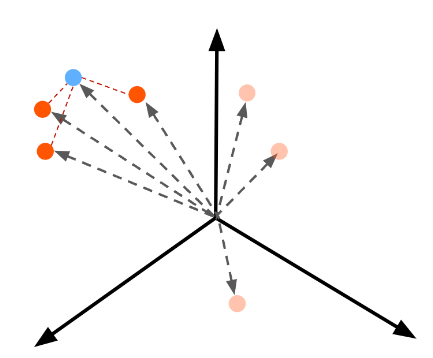

## 5. Example: Recommended articles  00:43 - 01:18
We're returning to the news article dataset to design a recommendation system that recommends the three most similar articles to the one currently being read. This recommendation will be based on the article's headline, topic, and keywords, stored in a dictionary called `current_article`. This particular article is about the impact of computer hardware on AI advancement. 

To prepare both of these objects for embedding, we'll first need to combine the features into a single string for each article.

In [33]:
articles[0]

{'headline': 'Economic Growth Continues Amid Global Uncertainty',
 'topic': 'Business',
 'keywords': ['economy', 'business', 'finance']}

In [65]:
current_article = {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
                   "topic": "Tech",
                   "keywords": ["ai", "business", "computers"]}

## 6. Combining features  01:18 - 01:48
We'll be reusing the `create_article_text` function you may remember from earlier, which extracts the headline, topic, and keywords, and uses an F-string to combine them into a single string. To combine the features, we call the function on each article in articles using a list comprehension, and do the same for the current article. By printing, we can see that the function correctly formatted the current article's information.

In [35]:
def create_article_text(article):
    return f"""Headline: {article['headline']}
Topic: {article['topic']}
Keywords: {', '.join(article['keywords'])}"""

In [66]:
article_texts = [create_article_text(article) for article in articles]
current_article_text = create_article_text(current_article)
print(current_article_text)

Headline: How NVIDIA GPUs Could Decide Who Wins the AI Race
Topic: Tech
Keywords: ai, business, computers


## 7. Creating Embeddings  01:48 - 02:01
Next, we embed both sets of article strings using the `create_embeddings` function from earlier, which allows us to create requests to the OpenAI embedding model in a more repeatable way.

In [47]:
client = get_openai_client()

In [60]:
# The type of current_article_embeddings is list[list], length = 1
# [0] means get the first element which is the embeddings with 1536 floats
current_article_embeddings = create_embeddings(client, current_article_text)[0]

# The type of article_embeddings is also list[lsit] but with length = 10
article_embeddings = create_embeddings(client, article_texts)

## 8-9. Finding the most similar article  02:01 - 02:44
Finally, to compute the cosine distances and extract the nearest distances, we'll use our `find_n_closest` function, which computes the cosine distances, sorts them, and returns the n smallest and their index. We'll call this function on both sets of embedded articles, and then loop through the results, returning the headline of each article in the three most similar articles.

There we have it! This is a good start, but a more sophisticated system would use not only the current article to base the recommendations on, but also the other articles in the user's history.

In [62]:
hits = find_n_colsest(current_article_embeddings, article_embeddings)

In [63]:
for hit in hits:
    article = articles[hit['index']]
    print(article['headline'])

Tech Giant Buys 49% Skate In AI Startup
Scientists Make Breakthrough Discovery in Renewable Energy
Tech Company Launches Innovative Product to Improve Online Accessibility


## 10. Adding user history  02:44 - 02:54
Let's consider that a user has visited two articles, stored in `user_history`. How can we provide recommendations based on multiple data points?

In [64]:
user_history = [
    {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
     "topic": "Tech",
     "keywords": ["ai", "business", "computers"]},
    {"headline": "The Giant Buys 49% Stake In AI Startup",
     "topic": "Tech",
     "keywords": ["ai", "business"]}
]

## 11-16. Recommendations on multiple data points  02:54 - 04:01
This is the situation we have, where the user has seen two articles, embedded in blue, and we want to recommend the most similar article. Articles they haven't seen yet are shown in red. To find the most similar vector to two vectors, we'll 
- combine the two vectors into one by taking the mean.
- Then, we'll compute cosine distances as we did before,
- and recommend the closest vector.

If the nearest point has already been viewed, we'll make sure to return the nearest unseen article.

The first two steps to embed the `user_history` are the same as before, combining the features for each article, and embedding the resulting strings. The only difference is that we take the mean to aggregate the two vectors into one that we can compare with the other articles. 

For the articles to recommend, we filter the list so it only contains articles not in the `user_history`. Then, as before, we combine the features and embed the text.

In [69]:
import numpy as np

In [70]:
history_texts =  [create_article_text(article) for article in user_history]
history_embeddings = create_embeddings(client, history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

articles_filtered =  [article for article in articles if article not in user_history]
article_texts =  [create_article_text(article) for article in articles_filtered]
article_embeddings = create_embeddings(client, article_texts)

## 17. Recommendations on multiple data points  04:01 - 04:31
Finally, we compute the cosine distances using the same `find_n_closest` function, only this time, passing it the mean of the embedded user history. Then, we subset the filtered article list to find the most similar articles. Here they are! Notice that the article headlined, "Tech Giant Buys 49% Stake In AI Startup" wasn't recommended, as the user had already seen it.

In [71]:
hits = find_n_closest(mean_history_embeddings, article_embeddings)
for hit in hits:
    article = articles_filtered[hit['index']]
    print(article['headline'])

Tech Giant Buys 49% Skate In AI Startup
Tech Company Launches Innovative Product to Improve Online Accessibility
Scientists Make Breakthrough Discovery in Renewable Energy


## 18. Let's practice!  04:31 - 04:34
Now it's your turn!

# 2.6 Product recommendation system
In this exercise, you'll make a recommendation system for an online retailer that sells a variety of products. This system recommends three similar products to users who visit a product page but don't purchase, based on the last product they visited.

You've been provided with a list of dictionaries of products available on the site,
```
products = [
- {
    - `"title"`: "Smartphone X1",
    - `"short_description"`: "The latest flagship smartphone with AI-powered features and 5G connectivity.",
    - `"price"`: `799.99`,
    - `"category"`: `"Electronics"`,
    - `"features"`: [
"6.5-inch AMOLED display",
...
"Fast wireless charging"
    - ]
- },
- ...
]
```
and a dictionary for the last product the user visited, stored in `last_product`.

The following custom functions defined earlier in the course are also available for you to use:

create_embeddings(texts) → returns a list of embeddings for each text in texts.
create_product_text(product) → combines the product features into a single string for embedding.
find_n_closest(query_vector, embeddings, n=3) → returns the n closest distances and their indexes between the `query_vector` and embeddings, based on cosine distances.

 Instructions  100XP
- Copy your API key and provide it to the OpenAI client.
- Combine the text features in `last_product`, and for each product in products, using `create_product_text()`.
- Embed the `last_product_text` and `product_texts` using `create_embeddings()`, ensuring that `last_product_embeddings` is a single list.
- Find the three smallest cosine distances and their indexes using `find_n_closest()`.

In [73]:
last_product = {'title': 'Building Blocks Deluxe Set',
                'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.',
                'price': 34.99,
                'category': 'Toys',
                'features': ['Includes 500+ colorful building blocks',
                             'Promotes STEM learning and creativity',
                             'Compatible with other major brick brands',
                             'Comes with a durable storage container',
                             'Ideal for children ages 3 and up']}

In [75]:
# Define a function to combine the relevant features into a single string
def create_product_text(product):
    """This is a function used to create text of product.

    Args:
        product (dict): the dictionay with specific keys.
    """
    return f"""Title: {product['title']}
Description: {product['short_description']}
Category: {product['category']}
Features: {', '.join(product['features'])}"""

In [80]:
# Set your API key
client = get_openai_client()

# Combine the features for last_product and each product in products
last_product_text = create_product_text(last_product)
product_texts = [create_product_text(product) for product in products ]

# Embed last_product_text and product_texts
last_product_embeddings = create_embeddings(client, last_product_text)[0]
product_embeddings = create_embeddings(client, product_texts)

# Find the three smallest cosine distances and their indexes
hits = find_n_closest(last_product_embeddings, product_embeddings)

for hit in hits:
  product = products[hit['index']]
  print(product['title'])

LEGO Space Shuttle
Robot Building Kit
Luxury Skincare Set


Congratulations on making your first recommendation engine! As you can see, you were able to make very relevant recommendations based on the last product that the user viewed, a set of building blocks. In the next exercise, you'll integrate a user history into your system, so you can base your recommendations on even more data points.

# 2.7 Adding user history to the recommendation engine
For many recommendation cases, such as film or purchase recommendation, basing the next recommendation on one data point will be insufficient. In these cases, you'll need to embed all or some of the user's history for more accurate and relevant recommendations.

In this exercise, you'll extend your product recommendation system to consider all of the products the user has previously visited, which are stored in a list of dictionaries called `user_history`.

The following custom functions are available for you to use: create_embeddings(texts), create_product_text(product), and find_n_closest(query_vector, embeddings, n=3). numpy has also been imported as np.

 Instructions  100XP
- Copy your API key and provide it to the OpenAI client.
- Combine the text features for each product in `user_history`, embed the resulting strings, and calculate the mean embeddings using numpy.
- Filter products to remove any products that are present in `user_history`.
- Combine the features for each product in `products_filtered` and embed the resulting strings.

In [81]:
user_history = [
    {'title': 'Remote-Controlled Dinosaur Toy',
     'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
     'price': 49.99,
     'category': 'Toys',
     'features': ['Realistic dinosaur sound effects',
                  'Walks and roars like a real dinosaur',
                  'Remote control included',
                  'Educational and entertaining']},
    {'title': 'Building Blocks Deluxe Set',
     'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.',
     'price': 34.99,
     'category': 'Toys',
     'features': ['Includes 500+ colorful building blocks',
                  'Promotes STEM learning and creativity',
                  'Compatible with other major brick brands',
                  'Comes with a durable storage container',
                  'Ideal for children ages 3 and up']}]

In [84]:
# Prepare and embed the user_history, and calculate the mean embeddings
history_texts = [create_product_text(article) for article in user_history]
history_embeddings = create_embeddings(client, history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

# Filter products to remove any in user_history
products_filtered = [product for product in products if product not in user_history]

# Combine product features and embed the resulting texts
product_texts = [create_product_text(product) for product in products_filtered]
product_embeddings = create_embeddings(client, product_texts)

hits = find_n_closest(mean_history_embeddings, product_embeddings)

for hit in hits:
  product = products_filtered[hit['index']]
  print(product['title'])

Robot Building Kit
LEGO Space Shuttle
RC Racing Car


Brilliant work! Recommendations based on a user's history are incredibly powerful. The mean isn't the only way to aggregate the history either, you could try a weighted mean to place more emphasis on recent views if the datetime data was available, for example. On to the final common application of embeddings: classification tasks!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# 2.8 Embeddings for classification tasks  00:00 - 00:06
The final common embedding use case we'll discuss are classification tasks.

## 2-3. Classification tasks  00:06 - 00:34
Classification tasks can take different forms, but generally, they involve assigning labels to items. Common tasks include categorization, such as categorizing headlines into different topics; and sentiment analysis, such as classifying reviews as positive or negative. 

Embeddings can be used for both of these cases, utilizing the model's ability to capture semantic meaning.

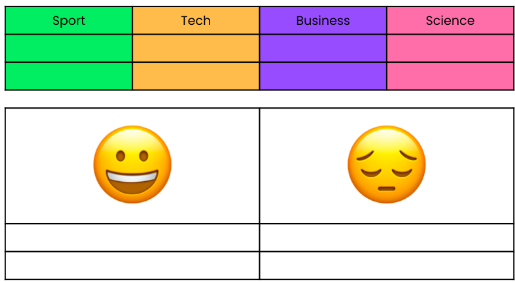

## 4-6. Classification with embeddings  00:34 - 01:24
We'll be using a type of classification called zero-shot classification, which means that the classifications won't be based on labeled examples. Let's look at how that works with an example on classifying news articles by topic. 

First, we begin by embedding a description of each class label. Here, we'll be using four classes: tech, science, sport, and business. We'll be embedding these labels and using them as reference points to base the classification on.

Next, we embed the article to classify, and calculate cosine distances to each embedded label.

Finally, we assign the article the label with the smallest cosine distance. Let's do this in Python!

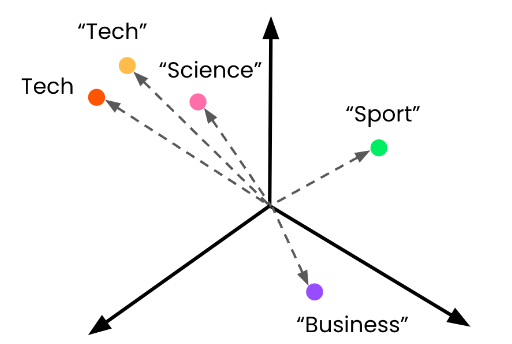

## 7. Embedding class descriptions  01:24 - 01:50
Here are the topic classes we'll be categorizing with. In this example, we'll categorize using the label itself, so the first step is to extract the labels as a single list and use these as the class descriptions. Then embed each topic label using the `create_embeddings` custom function that makes a call to the OpenAI embedding model.

In [85]:
topics = [
    {'label': 'Tech'},
    {'label': 'Science'},
    {'label': 'Sport'},
    {'label': 'Business'},
]
class_descriptions = [topic['label'] for topic in topics]
class_embeddings = create_embeddings(client, class_descriptions)

## 8. Embedding item to classify  01:50 - 02:23
Here's the article we want to classify. The first step here is to combine the headline and keyword information into a single string that we can embed. We do this by defining a custom function that uses an F-string to concatenate the headline and keywords inside a nicely formatted string. Finally, we can embed the text by calling `create_embeddings` again, remembering to zero-index the list returned so we have a single list of numbers.

In [86]:
article = {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
           "keywords": ["ai", "business", "computers"]}
def create_article_text(article):
    return f"""Headline: {article['headline']}
Keywords: {', '.join(article['keywords'])}"""

article_text = create_article_text(article)
article_embeddings = create_embeddings(client, article_text)[0]

## 9. Compute cosine distances  02:23 - 02:52
Now that we have the embeddings, it's time for the cosine distances calculations. This is a modified version of the `find_n_closest` custom function from earlier in the course, where instead of returning n results, we only want one: the nearest label. This means that instead of sorting by distance, we can find the minimum using the `min` function. Calling this function will return the distance and index of this label.

In [87]:
# from scipy.spatial import distance

def find_colsest(query_vector, embeddings):
    distances = []
    for index, embedding in enumerate(embeddings):
        dist = distance.cosine(query_vector, embedding)
        distances.append({"distance": dist, "index": index})
    return min(distances, key=lambda x: x["distance"])

closest = find_colsest(article_embeddings, class_embeddings)

## 10. Extract the most similar label  02:52 - 03:41
Finally, we can use this index to subset the topics dictionary and extract the label. Printing the result, returns the Business label. Wait, this doesn't seem right. 

If we take another look at the article we're classifying, we can see that the headline indicates that the focus of the article is on tech; it's likely that the model captured the business keyword which resulted in the mislabeling. The limitation in our approach that led to this was that the class descriptions lacked detail. The word `"Business"` or `"Tech"` doesn't contain much meaning on its own for the model to capture, so a better approach would be to use more detailed class descriptions.

In [88]:
label = topics[closest['index']]['label']
print(label)

Business


In [89]:
article = {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
           "keywords": ["ai", "business", "computers"]}

## 11. More detailed descriptions  03:41 - 04:09
Let's try this again, but instead of using the labels as the descriptions, we use short descriptions to represent each class. The steps here are almost identical. 

We extract the descriptions in a single list, this time using the description key, and embed them. The rest of the code is the same! This time, when we print the result, we can see that the model classified correctly.

In [90]:
topics = [
    {'label': 'Tech', 'description': 'A news article about technology'},
    {'label': 'Science', 'description': 'A news article about science'},
    {'label': 'Sport', 'description': 'A news article about sports'},
    {'label': 'Business', 'description': 'A news article about business'},
]

class_description = [topic['description'] for topic in topics]
class_embeddings = create_embeddings(client, class_description)

closest = find_colsest(article_embeddings, class_embeddings)
label = topics[closest['index']]['label']
print(label)

Tech


## 12. Let's practice!  04:09 - 04:13
Now it's your turn to give this a try!

# 2.9 Embedding restaurant reviews
One common classification task that embeddings are great for is sentiment analysis. In this and the following exercises, you'll navigate through the workflow of performing sentiment analysis using embeddings.

You've been provided with a small sample of restaurant reviews, stored in reviews, and sentiment labels stored in sentiments:

sentiments = [{'label': 'Positive'},
{'label': 'Neutral'},
{'label': 'Negative'}]

reviews = ["The food was delicious!",
"The service was a bit slow but the food was good",
"Never going back!"]
You'll use zero-shot classification to classify the sentiment of these reviews by embedding the reviews and class labels.

The `create_embeddings()` function you created previously is also available to use.

 Instructions  100XP
- Copy your API key and provide it to the OpenAI client.
- Create a list of class descriptions from the labels in the sentiments dictionary using a list comprehension.
- Embed `class_descriptions` and reviews using the `create_embeddings()` function.

In [91]:
sentiments = [{'label': 'Positive'},
              {'label': 'Neutral'},
              {'label': 'Negative'}]

reviews = ["The food was delicious!",
           "The service was a bit slow but the food was good",
           "Never going back!"]

In [92]:
# Create a list of class descriptions from the sentiment labels
class_descriptions = [sentiment['label'] for sentiment in sentiments]

# Embed the class_descriptions and reviews
class_embeddings = create_embeddings(client, class_descriptions)
review_embeddings = create_embeddings(client, reviews )

Great job! Now that you have your embeddings, it's time to compute cosine distances and extract the most similar labels!

# 2.10 Classifying review sentiment
Now that you've calculated the embeddings, it's time to compute the cosine distances and extract the most similar label.

You'll do this by defining a function called `find_closest()`, which can be used to compare the embeddings between one vector and multiple others, and return the nearest distance and its index. You'll then loop over the reviews and and use `find_closest()` to find the closest distance for each review, extracting the classified label using the index.

The `class_embeddings` and `review_embeddings` objects you created in the last exercise are available for you to use, as well as the reviews and sentiments.

 Instructions  100XP
- Define a function called `find_closest()` that returns the distance and index of the most similar embedding to the `query_vector`.
- Use `find_closest()` to find the closest distance between each review's embeddings and the `class_embeddings`.
- Use the `'index'` of closest to subset sentiments and extract the `'label'`.

In [100]:
# Define a function to return the minimum distance and its index
def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  # Find the closest distance and its index using find_closest()
  closest = find_closest(review_embeddings[index], class_embeddings)
  # Subset sentiments using the index from closest
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')

"The food was delicious!" was classified as Positive
"The service was a bit slow but the food was good" was classified as Neutral
"Never going back!" was classified as Positive


Well done! The labels for the first and second reviews look very reasonable, but the final review looks suspicious. It's likely that the class_descriptions aren't detailed enough for the embedding model to accurately represent the class. Let's fix this in the next exercise!

# 2.11 Embedding more detailed descriptions
One of the last predicted labels didn't seem representative of the review; this was probably down to the lack of information being captured when we're only embedding the class labels. This time, descriptions of each class will be embedded instead, so the model better `"understands"` that you're classifying restaurant reviews.

The following objects are available for you to use:

sentiments = [{'label': `'Positive'`,
`'description'`: 'A positive restaurant review'},
{'label': `'Neutral'`,
'description':'A neutral restaurant review'},
{'label': `'Negative'`,
`'description'`: 'A negative restaurant review'}]

reviews = ["The food was delicious!",
"The service was a bit slow but the food was good",
"Never going back!"]

 Instructions  100XP
- Copy your API key and provide it to the OpenAI client.
- Extract a list containing the sentiment descriptions and embed them.

In [101]:
sentiments = [{'label': 'Positive', 'description': 'A positive restaurant review'}, 
              {'label': 'Neutral', 'description':'A neutral restaurant review'},
              {'label': 'Negative', 'description': 'A negative restaurant review'}]

reviews = ["The food was delicious!", 
           "The service was a bit slow but the food was good",
           "Never going back!"]

In [103]:
# Extract and embed the descriptions from sentiments
class_descriptions = [sentiment['description'] for sentiment in sentiments]
class_embeddings = create_embeddings(client, class_descriptions)
review_embeddings = create_embeddings(client, reviews)

def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  closest = find_closest(review_embeddings[index], class_embeddings)
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')

"The food was delicious!" was classified as Positive
"The service was a bit slow but the food was good" was classified as Neutral
"Never going back!" was classified as Negative


There you have it! This time, you were able to correctly classify the final review! Even short and simple descriptions had a big impact on the results—adding more detail will make these zero-shot classifications even more accurate. Onwards to the final chapter on vector databases!

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>